# Research assignment 4


Anh Nguyen Tran

Political Party, Political Ideology, and Educational Attainment: Homework Example

03/07/2024

In [1]:
*Loading in the GSS data

set maxvar 32000
use GSS_1972_2021.dta, clear
eststo clear

*Do "eststo clear" up here so that you are coming into Jupyter Notebook clean and ready for a new table.

In [2]:
codebook rincome age educ race sex partyid polviews


-------------------------------------------------------------------------------
rincome                                                      respondents income
-------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: INCOME

                 Range: [1,12]                        Units: 1
         Unique values: 12                        Missing .: 0/68,846
       Unique mv codes: 5                        Missing .*: 28,503/68,846

              Examples: 9     $10,000 to $14,999
                        12    $25,000 or more
                        .i    iap
                        .i    iap

-------------------------------------------------------------------------------
age                                                           age of respondent
-------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: AGE, but 7

In [3]:
keep rincome age educ race sex partyid polviews

*There are theoretical/technical reasons for changing the form of income (stated in the PowerPoint)
gen rincomeln = log(rincome)

(28,503 missing values generated)


I follow Charlie's example and log income (logging income is common practice in economics and political science). Charlie has age squared. I will not square age in my project because whether or not people are near retirement age does not affect their education level like it would affect income. However, I will control for age because older people tend to have higher levels of education.

In [4]:
*Making new variables for partyid and polviews to turn them from ordinal to nominal variables

gen party = .
replace party = 0 if partyid == 0 | partyid == 1
replace party = 1 if partyid == 2 | partyid == 3 | partyid == 4 | partyid == 7
replace party = 2 if partyid == 5 | partyid == 6

label variable party "Party Identification"
label define party 0 "Democrat" 1 "Independent/Other Party" 2 "Republican"
label values party party

gen polideo = .

replace polideo = 0 if polviews == 1 | polviews == 2 
replace polideo = 1 if polviews == 3 | polviews == 4 | polviews == 5
replace polideo = 2 if polviews == 6 | polviews == 7

label variable polideo "Political Ideology"
label define polideo 0 "Liberal" 1 "Centrist/Moderates" 2 "Conservative"
label values polideo polideo

(68,846 missing values generated)
(25,035 real changes made)
(26,202 real changes made)
(17,159 real changes made)
(68,846 missing values generated)
(9,026 real changes made)
(39,413 real changes made)
(10,853 real changes made)


In [5]:
tab partyid party
tab polviews polideo


      political party |       Party Identification
          affiliation |  Democrat  Independe  Republica |     Total
----------------------+---------------------------------+----------
      strong democrat |    11,200          0          0 |    11,200 
not very strong democ |    13,835          0          0 |    13,835 
independent, close to |         0      8,263          0 |     8,263 
independent (neither, |         0     10,705          0 |    10,705 
independent, close to |         0      6,048          0 |     6,048 
not very strong repub |         0          0     10,317 |    10,317 
    strong republican |         0          0      6,842 |     6,842 
          other party |         0      1,186          0 |     1,186 
----------------------+---------------------------------+----------
                Total |    25,035     26,202     17,159 |    68,396 

     think of self as |
           liberal or |        Political Ideology
         conservative |   Liberal  Centrist/  Co

In [6]:
pwcorr sex rincomeln polideo party

*In addition to theory, moderate correlation between political ideology and party identification suggests an interaction.
*There may be some interactions between sex and income based on the correlation and on theory as well.


             |      sex rincom~n  polideo    party
-------------+------------------------------------
         sex |   1.0000 
   rincomeln |  -0.1816   1.0000 
     polideo |  -0.0247   0.0313   1.0000 
       party |  -0.0574   0.0366   0.3094   1.0000 


In [7]:
gen female = sex==2

In [8]:
tab female sex


           |    respondents sex
    female |      male     female |     Total
-----------+----------------------+----------
         0 |    30,350          0 |    30,350 
         1 |         0     38,404 |    38,404 
-----------+----------------------+----------
     Total |    30,350     38,404 |    68,754 


### What am I working with?

Dependent variable (interval-ratio): Education

Independent variables of interest: Party identification, Political ideology, Log income, Sex

Control variables: Age, Race

## 1. Develop hypotheses about interactions between your independent variables [1 pt]

You can use the GSS data, Student aid data, or your own data

    A. Write at least one hypothesis involving one of the two following types of interactions
        1) nominal * nominal
        2) nominal * interval-ratio
        
    B. State the predicted direction of association between your dependent variable and:
        1) each of the 2 independent variables by themselves
        2) the interaction of the 2 indendent variables
        3) you can predict that there is no association
        
    C. Write a couple sentences about the theoretical reasons (prior knowledge / research) for each of your predictions

### See Anh's PowerPoint for an example of her reasons behind her thoughts on 1A-1C.

Link: https://www.canva.com/design/DAF-zYCheAg/gvrn2HpHzCrVhAjkplE32A/view?utm_content=DAF-zYCheAg&utm_campaign=designshare&utm_medium=link&utm_source=editor

## 2. Test your hypotheses [3 pts]

    A. For each hypothesized interactive relationship: use regression with the appropriate interaction syntax to estimate 1 model with uninteracted variables and 1 model with interacted variables. Use --esttab-- to output a model with the 2 tables
    
    B. Use margins and marginsplot with the appropriate syntax to visually represent your regression adjusted estimates for given nominal categories or at given interval-ratio values

In [9]:
*Generate the regression model WITHOUT the interaction terms

eststo: reg educ rincomeln i.female age i.race i.party i.polideo


      Source |       SS           df       MS      Number of obs   =    36,684
-------------+----------------------------------   F(9, 36674)     =    405.08
       Model |  27692.7672         9  3076.97413   Prob > F        =    0.0000
    Residual |  278574.794    36,674  7.59597519   R-squared       =    0.0904
-------------+----------------------------------   Adj R-squared   =    0.0902
       Total |  306267.561    36,683  8.34903256   Root MSE        =    2.7561

------------------------------------------------------------------------------
        educ | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
   rincomeln |   1.265872   .0244696    51.73   0.000     1.217911    1.313833
    1.female |   .4612106   .0294586    15.66   0.000     .4034709    .5189503
         age |   -.011092   .0010758   -10.31   0.000    -.0132006   -.0089834
             |
        race |
      black  |  -.59

There are some noteworthy results here. For instance, the coefficient of 0.38 for Republicans indicates that, holding all other variables constant, individuals who identify as Republicans have on average 0.38 more years of education compared to individuals identify as Democrats. This result is statistically significant (p < 0.001).

In [10]:
*Generate the regression model WITH the interaction terms

eststo: reg educ c.rincomeln##i.female age i.race i.party##i.polideo

*Remember: interval-ratio variables must be denoted with "c." in the interaction term here


      Source |       SS           df       MS      Number of obs   =    36,684
-------------+----------------------------------   F(14, 36669)    =    306.46
       Model |  32081.0713        14   2291.5051   Prob > F        =    0.0000
    Residual |   274186.49    36,669  7.47733753   R-squared       =    0.1047
-------------+----------------------------------   Adj R-squared   =    0.1044
       Total |  306267.561    36,683  8.34903256   Root MSE        =    2.7345

------------------------------------------------------------------------------
        educ | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
   rincomeln |   1.393886   .0399586    34.88   0.000     1.315566    1.472206
    1.female |   .9943512   .1105599     8.99   0.000     .7776506    1.211052
             |
      female#|
 c.rincomeln |
          1  |  -.2523959   .0498633    -5.06   0.000    -.3501294   -.1546624
     

In [11]:
esttab, stats(r2 N, labels("R-Squared" "N")) cells(b(star fmt(3)) se(fmt(3) par)) /// 
nobase mlabels ("Model 1" "Model 2") starlevels(* .05 ** .01 *** .001) ///
coeflabels (rincomeln "Log income" educ "Education" 1.female "Female" 2.race "Black" 3.race "Other race" ///
1.party "Independent" 2.party "Republican" 1.polideo "Centrist" 2.polideo "Conservative") noconstant

*Keep in mind that there are omitted categories that act as points of comparison for nominal variables


--------------------------------------------
                      (1)             (2)   
                  Model 1         Model 2   
                     b/se            b/se   
--------------------------------------------
Log income          1.266***        1.394***
                  (0.024)         (0.040)   
Female              0.461***        0.994***
                  (0.029)         (0.111)   
age                -0.011***       -0.012***
                  (0.001)         (0.001)   
Black              -0.597***       -0.537***
                  (0.044)         (0.044)   
Other race         -0.491***       -0.470***
                  (0.061)         (0.060)   
Independent        -0.015          -0.664***
                  (0.035)         (0.076)   
Republican          0.384***       -1.902***
                  (0.041)         (0.138)   
Centrist           -0.943***       -1.390***
                  (0.041)         (0.056)   
Conservative       -0.955***       -2.379***
         

#### Interpretating regression results in the tables

These tables are hard to read, but there a few things to focus on here:
1. Are the coefficients significant on their own? If the coefficient is significant for a particular factor, what is the magnitude and direction of the coefficient? It is still important to look at the coefficient for Female for instance. 
2. Look over the statistical significance of the interaction terms. If the interaction terms are not statistically significant, this suggests that there are not strong interactions between the two independent variables. Essentially, the effect of one variable on the dependent variable does not significantly depend on the other variable.

#### What if the interaction terms are significant but the individual coefficients are not?

Sometimes you may find that the coefficients for the independent variables are not significant, whereas the interaction terms between the independent variables are significant. Why is this?
1. The interaction term represents the combined effect of two variables on the dependent variable. If this combined effect is strong, it can lead to the interaction term being significant even if the individual effects are weak or inconsistent.
2. The significance of an interaction term might indicate a non-linear relationship between the variables and the outcome. Basically, the independent variables might not have a significant linear relationship with the dependent variable, but together they might have a significant non-linear effect.
3. The relationship between one independent variable and the dependent variable may be changing at different levels of another independent variable. Basically, the effect of one variable on the dependent variable may depend on the level of another variable.

##### Don't forget to adjust the settings for graph visibility

In [12]:
%set graph_width = 11

graph size was (5.5in, 4in), is now (11, 4in).


In [13]:
%set graph_height = 8

graph size was (11, 4in), is now (11, 8).


##### Then you can create the margins plots for 2b


Variables that uniquely identify margins: party polideo


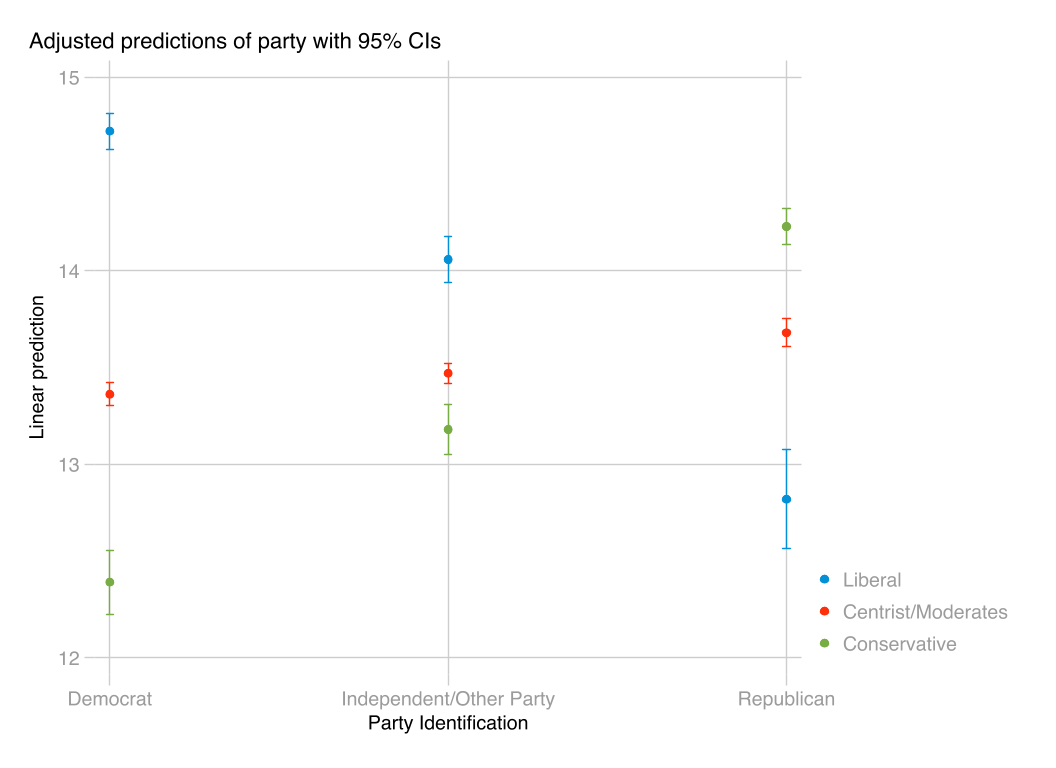

In [14]:
*Plotting margins for nominal - nominal interaction terms

quietly reg educ c.rincomeln##i.female age i.race i.party##i.polideo
quietly margins i.party, over(polideo) atmeans
marginsplot, recast(scatter) scheme(538w)

### How do we interpret this first margins plot?

1. First focus on the individual categories for the x-axis (party identification).

For Democrats, Liberals have the highest predicted years of education, followed by Centrists/Moderates and then Conservatives. There's a clear downward trend as we move from Liberal to Conservative within the Democrat category.

A similar trend is observed for Independents or people registered with other parties. However, conservatives within this category have higher years of education compared to Conservatives registered with the Democrat party.

For Republicans, Conservatives have the highest predicted years of education, followed by Centrists/Moderates, and then Liberals.

2. Think about your hypothesis

Political ideology appears to have a different impact on years of education depending on party identification. For Democrats, being more liberal is associated with higher education, whereas for Republicans, being more conservative is associated with higher education. Independents show polarizing extremes in predicted education levels based on ideology, but Conservatives are predicted to have fewer years of education compared to Liberals and Centrists/Moderates within this group.

NOTE: If your interaction term(s) is significant, you will see results like this. My interaction terms for political ideology and party identification are all significant. If your interaction terms are not significant, you will see much less variation across the x-axis.

In [15]:
sum rincomeln


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
   rincomeln |     40,343    2.108366    .6094026          0   2.484907



Variables that uniquely identify margins: rincomeln female


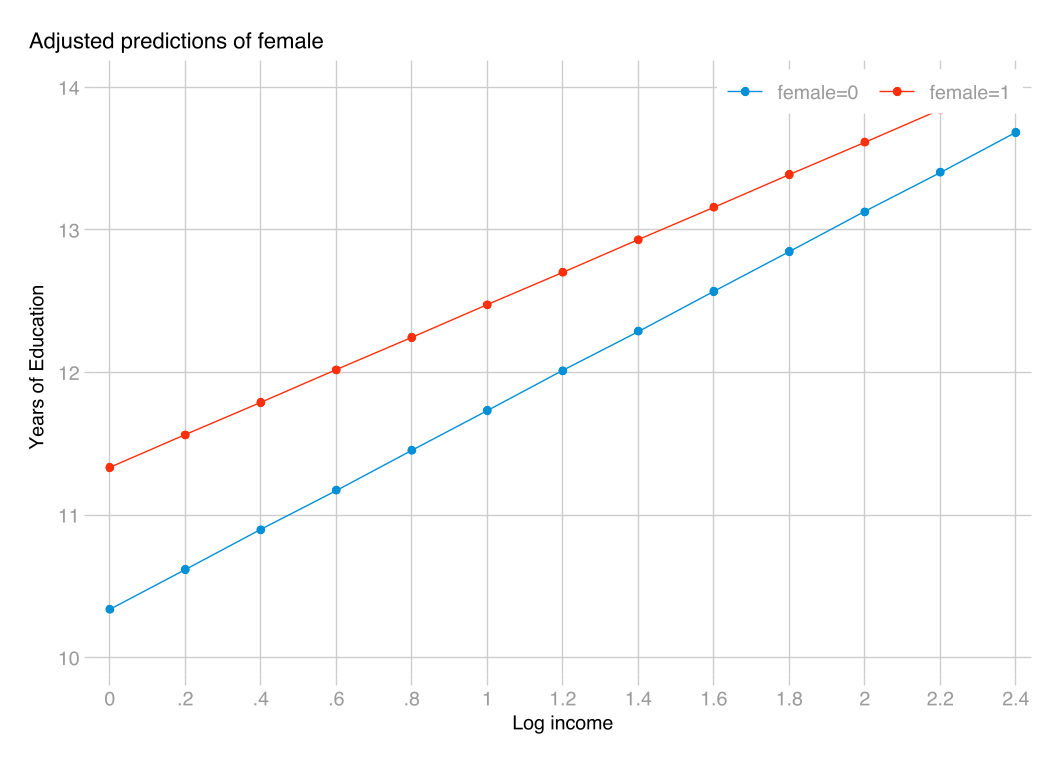

In [16]:
*Plotting margins for nominal - interval-ratio interaction terms

quietly reg educ c.rincomeln##i.female age i.race i.party##i.polideo

quietly margins female, at(rincomeln=(0(.2)2.484907)) atmeans
marginsplot, noci legend(on) xtitle("Log income") ///
ytitle("Years of Education") legend(rows(1) position(1) ring(0)) scheme(538w)

### How do we interpret this second margins plot?

Both lines are upward sloping, indicating that for both males and females, as log income increases, the predicted years of education also increase. This suggests a positive relationship between income and years of education. Basically, the more income you have the more likely you are to attain more education, and this is true whether you are a woman or man.

The red line (representing women) is consistently above the blue line (representing men). This shows that at all observed levels of log income, women are predicted to more years of education than men. Furthermore, the lines are not parallel (they almost seem to be closing in on one another at the topic), which indicates a difference in slope. The difference in the slopes of the lines for women and men implies that the rate of increase in years of education with respect to log income is different between the sexes.

Surprisingly, this result suggests that the rate of increase in years of education with respect to log income is greater for women than for men. Basically, as income increases, the predicted years of education for women increases more than for men! This holds implications for my hypothesis and predictions on the interaction effects between sex and log income.

## 3. Interpret your results [1 pt]

Write a couple sentences answering each of the following questions:

    A. Do the results support or contradict each of your hypotheses?
    
    B. Why do the regression coefficients support or contradict your hypotheses?
    
    C. Why do your regression adjusted estimates from margins for nominal categories or given interval-ratio values support or contradict your hypotheses?

#### Notes on interpreting results

FOR 3A
1) Note if there are differences in magnitude, direction, and statistical significance for the independent variables you are interested in between the model with interaction terms and the model with no interaction terms.

2) Relate these differences back to the hypothesis, focusing on the model that provides better support for your hypothesis (if available). If both models support your hypothesis, you may choose which one to focus on.

FOR 3B
1) Reference the literature or prior knowledge here with a focus on the relationship between the dependent variable and the independent variable(s). He is asking about theory (what are the potential reasons the results are like this?). For instance, are the results surprising and different than what is commonly found in the literature? Or are you providing support for a theory from the literature?

FOR 3C
1) Reference the literature or prior knowledge here with a focus on the relationship between the two independent variables interacting. Again, what is your theoretical explanation for what you found?

#### Don't forget to read the "ASA Statement on Statistical Significance and P-Values" (2016) for next class. This is a very important reading that all quantitative sociologists should know.